In [1]:
pip install ultralytics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [3]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Paths
dataDir = "/content/drive/My Drive/Pothole_Segmentation_YOLOv8/"  # Folder containing images


Mounted at /content/drive


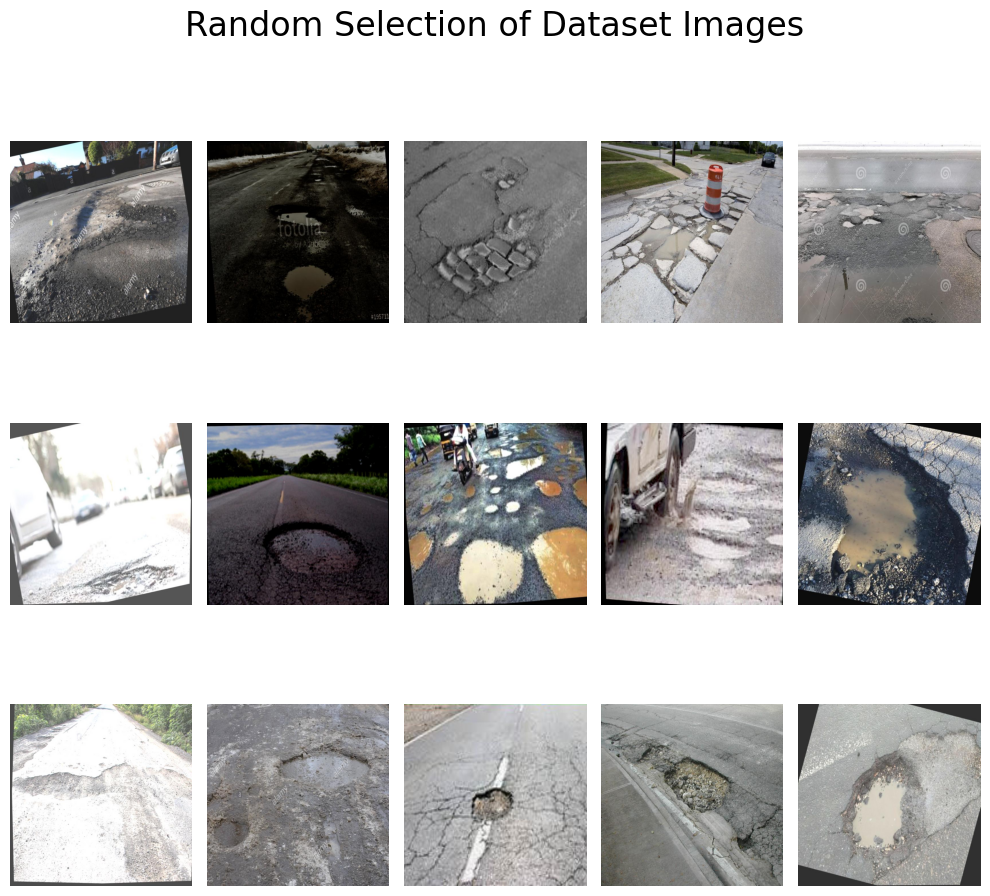

In [4]:
trainImagePath = os.path.join(dataDir, 'train','images')

#list of the images
imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)

plt.figure(figsize=(10, 10))

for i, image_file in enumerate(randomImages):

    image_path = os.path.join(trainImagePath, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

  # Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
model = YOLO('yolov8n-seg.pt') # for segmentation use 'yolov8n-seg.pt, change the model as you like !

In [6]:
yamlFilePath = os.path.join(dataDir,'data.yaml' )

In [7]:
results = model.train(
    data= yamlFilePath,
    epochs=5,
    imgsz=640,
    batch=8,
    optimizer='auto',
    lr0=0.0001,              # Initial learning rate
    lrf=0.01,                # Final learning rate (lr0 * lrf)
    dropout=0.25,            # Use dropout regularization
    device='cpu',                # Device to run on, i.e. cuda device=0
    seed=42
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience


image 1/1 /content/drive/My Drive/Pothole_Segmentation_YOLOv8/valid/images/pic-202-_jpg.rf.8c64ec46a9e120007c12c2e4841c9555.jpg: 640x640 3 Potholes, 327.6ms
Speed: 3.3ms preprocess, 327.6ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/My Drive/Pothole_Segmentation_YOLOv8/valid/images/pic-262-_jpg.rf.02970860794f859699c9f743bc0fd7d1.jpg: 640x640 (no detections), 333.1ms
Speed: 2.8ms preprocess, 333.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/My Drive/Pothole_Segmentation_YOLOv8/valid/images/pic-33-_jpg.rf.143c56d136e3245555b26b4d5108a4e1.jpg: 640x640 4 Potholes, 292.6ms
Speed: 2.6ms preprocess, 292.6ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/My Drive/Pothole_Segmentation_YOLOv8/valid/images/pic-17-_jpg.rf.0d172b6accedf4c52a3868d9b690d48b.jpg: 640x640 2 Potholes, 298.5ms
Speed: 2.8ms preprocess, 298.5ms inference, 8.1ms postprocess per ima

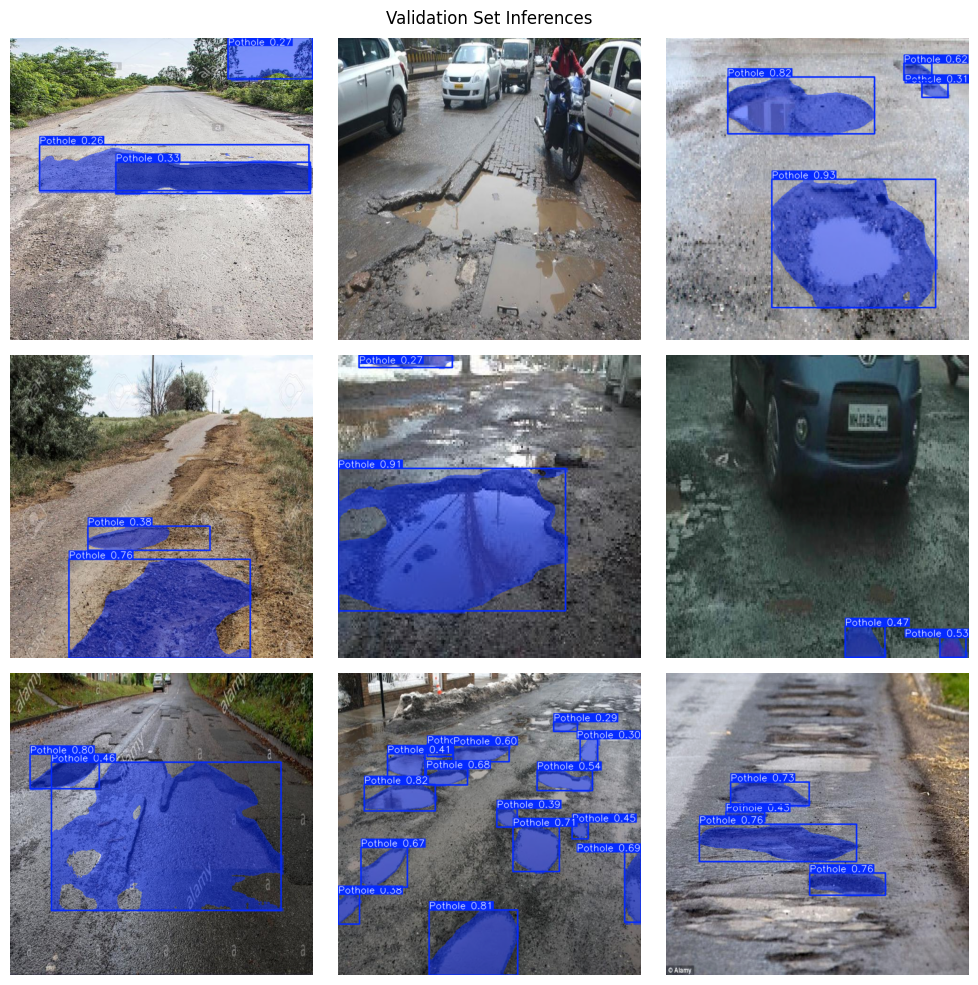

In [8]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

#select Random images
numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set Inferences')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = model.predict(source= imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()

Make the Inference video

In [9]:
# Change the model for the best model and do everything again and compare

bestModelpath = '/content/runs/detect/train/weights/best.pt'
bestModel = YOLO(bestModelpath)

In [10]:
import shutil
videoPath = '/content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4'

model.predict(source=videoPath, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 3 Potholes, 212.1ms
video 1/1 (frame 2/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 4 Potholes, 191.0ms
video 1/1 (frame 3/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 3 Potholes, 180.9ms
video 1/1 (frame 4/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.m

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Pothole'}
 obb: None
 orig_img: array([[[139, 130, 122],
         [163, 154, 146],
         [164, 155, 147],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        [[197, 188, 180],
         [203, 194, 186],
         [169, 160, 152],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        [[152, 143, 135],
         [177, 168, 160],
         [181, 172, 164],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        ...,
 
        [[ 81,  93, 103],
         [ 75,  87,  97],
         [ 65,  77,  87],
         ...,
         [ 58,  78,  98],
         [ 60,  80, 100],
         [ 63,  83, 103]],
 
        [[ 65,  77,  87],
         [ 63,  75,  85],
         [ 58,  70,  8

In [11]:
import subprocess
from IPython.display import Video

# Ruta de entrada
input_path = "/content/drive/My Drive/Pothole_Segmentation_YOLOv8/output_video.mp4"
# Ruta de salida (nuevo archivo convertido)
output_path = "/content/drive/My Drive/Pothole_Segmentation_YOLOv8/output_converted.mp4"

# Convertir con FFmpeg
subprocess.call([
    "ffmpeg", "-y", "-loglevel", "panic",
    "-i", input_path,
    output_path
])

# Mostrar el video convertido
Video(output_path, embed=True, width=960)


In [12]:
import subprocess

# Convert AVI to MP4 using FFmpeg
subprocess.call(['ffmpeg', '-y', '-loglevel', 'panic', '-i', '/content/drive/My Drive/Pothole_Segmentation_YOLOv8/output_video.mp4'])

from IPython.display import Video

# Display the converted MP4 video
Video("/content/drive/My Drive/Pothole_Segmentation_YOLOv8/output_video.mp4", embed=True, width=960)

In [13]:
import shutil
import subprocess
from IPython.display import Video


# Path to the input video
video_path = '/content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4'

# Run the YOLO model on the video and save the output
results = model.predict(source=video_path, save=True, save_txt=False, save_conf=False)

# The default output is saved in the 'runs/detect' folder in a subfolder named after the model
output_dir = 'content/drive/My Drive/Pothole_Segmentation_YOLOv8'
output_video_path = f'{output_dir}/output_video.mp4'  # Make sure this is the correct saved output path

# Convert the output video to MP4 using FFmpeg (if necessary)
# This step is often unnecessary since YOLO typically saves output as MP4 by default, but if needed, run FFmpeg:
subprocess.call(['ffmpeg', '-y', '-loglevel', 'panic', '-i', output_video_path, output_video_path])

# Display the converted MP4 video
Video(output_video_path, embed=True, width=960)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 3 Potholes, 178.7ms
video 1/1 (frame 2/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 4 Potholes, 273.3ms
video 1/1 (frame 3/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 3 Potholes, 296.9ms
video 1/1 (frame 4/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.m

In [14]:
import shutil
from ultralytics import YOLO
from IPython.display import Video
import os

# Path to the input video
video_path = '/content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4'

# Run the YOLO model on the video and specify the save directory in Google Drive
results = model.predict(source=video_path, save=True, save_txt=False, save_conf=False, save_dir='/content/drive/My Drive/Pothole_Segmentation_YOLOv8/')

# Output will now be saved directly in your Google Drive folder
print(f"Results saved directly to Google Drive.")


# YOLO typically saves the output in 'runs/detect'
output_video_path = os.path.join(video_path, 'sample_video.mp4')  # Check if the video is saved here


# Display the output video using IPython
Video(output_video_path, embed=True, width=960)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 3 Potholes, 194.4ms
video 1/1 (frame 2/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 4 Potholes, 177.8ms
video 1/1 (frame 3/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.mp4: 384x640 3 Potholes, 181.8ms
video 1/1 (frame 4/692) /content/drive/My Drive/Pothole_Segmentation_YOLOv8/sample_video.m

In [15]:
!ls /content/runs/detect/

train
